## **Exercise 1: Weekday Summary Statistics**

# *Question 1* 

In [56]:
import pandas as pd 
df = pd.read_excel("/Users/juliannedavid/Downloads/treated_AQI_data_station_22.xlsx")

# We convert the date_time column to datetime format, so we can easily extract dates, hours, and perform time-based operations after.
df["date_time"] = pd.to_datetime(df["date_time"]) 

# We extract the date (without the time), group the data by day, calculate the daily mean of PM2.5, and reset the index to create a new DataFrame where each row represents one day and its average PM2.5 concentration.
daily_average = df.groupby(df["date_time"].dt.date)["pm25"].mean().reset_index()

# We rename the name of the columns for clarity
daily_average.columns = ["Date","PM25_Daily_Average"]

print (f"The average PM25 concentration for each day is :")
print (daily_average)

The average PM2.5 concentration for each day is :
           Date  PM25_Daily_Average
0    2025-02-27           43.201613
1    2025-02-28           42.645748
2    2025-03-01           47.641957
3    2025-03-02           91.404167
4    2025-03-03           73.608333
..          ...                 ...
160  2025-09-01           44.581607
161  2025-09-02           38.424713
162  2025-09-03           77.141251
163  2025-09-04           95.195733
164  2025-09-05          100.176914

[165 rows x 2 columns]


Text(0, 0.5, 'PM2.5 Concentration')

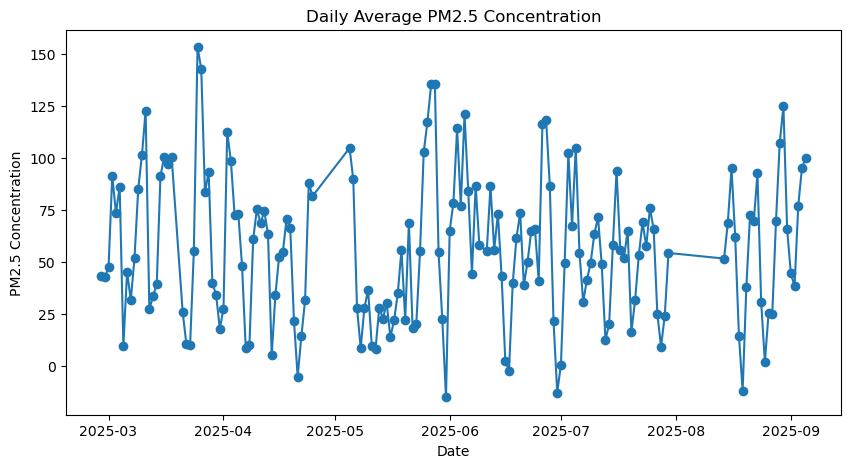

In [40]:
import matplotlib.pyplot as plt
# We create a new figure that is 10 inches wide and 5 inches tall, to control the size of our plot.
plt.figure(figsize = (10,5))

# We plot a line chart showing the daily average PM2.5 concentration over time.    
plt.plot(daily_average["Date"], daily_average["PM25_Daily_Average"], marker = "o")

# We put a title on our chart
plt.title("Daily Average PM25 Concentration")

# The x-axis represents the date
plt.xlabel("Date")

# The y-axis shows the daily average PM2.5 value
plt.ylabel("PM25 Concentration")

# *Question 2*

In [57]:
# We create a Boolean condition to select only the rows in daily_average where the date is between March 1st, 2025, and May 31st, 2025
spring_daily_data = (
    (daily_average['Date'] >= pd.to_datetime("2025-03-01").date()) &
    (daily_average['Date'] <= pd.to_datetime("2025-05-31").date())
)
 
# We filter the dataset and keep only the rows where the condition is True, resulting in a new DataFrame called spring that contains daily averages during spring
spring = daily_average.loc[spring_daily_data] 

# We find the row with the highest PM2.5 daily average within the spring dataset, and store it in max_spring
max_spring = spring.loc[spring["PM25_Daily_Average"].idxmax()]

print(max_spring)
print ("The city experience that has the largest PM25 concentration occured on 25th of March 2025 and has a 153.14 PM25 concentration average")

Date                  2025-03-25
PM25_Daily_Average    153.141667
Name: 24, dtype: object
The city experience that has the largest PM25 concentration occured on 25th of March 2025 and has a 153.14 PM25 concentration average


# *Question 3*

In [45]:
# We make sure the "Date" column in our spring DataFrame is in datetime format, so we can easily extract date-related information (like weekdays)
spring.loc[:,"Date"] = pd.to_datetime(spring["Date"])

# We create a new column called "weekday" that contains the name of the day for each day
spring.loc[:,"weekday"] = spring["Date"].dt.day_name()

# We define a list of weekdays (Monday to Friday) and filter the spring DataFrame to keep only weekdays, excluding weekends
weekdays_order = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
spring_weekday = spring[spring["weekday"].isin(weekdays_order)]

# We initialise an empty list that will store summary statistics for each weekday
stats_list = []

# We loop through each weekday and extract the PM2.5 daily averages corresponding to that day
for day in weekdays_order:
    data = spring_weekday[spring_weekday["weekday"] == day]["PM25_Daily_Average"]

    # For each weekday, we compute summary statistics and store them as a dictionary in stats_list
    stats_list.append({
        "Weekday": day,
        "Minimum": data.min(),
        "Maximum":data.max(),
        "Mean": data.mean(),
        "Standard deviation": data.std(),
        "Q1": data.quantile(0.25),
        "Median": data.median(),
        "Q3": data.quantile(0.75)
    })
# We convert the list of dictionaries into a new DataFrame called stats_df, which summarizes PM2.5 values by weekday
stats_df = pd.DataFrame(stats_list)

print (stats_df)

     Weekday    Minimum     Maximum       Mean  Standard deviation         Q1  \
0     Monday  -4.949594  117.352852  53.400517           45.097157   8.508691   
1    Tuesday  10.368317  153.141667  68.724890           51.591192  26.220906   
2  Wednesday   9.877756  142.777778  63.038660           47.030434  27.790199   
3   Thursday   8.724474   98.391489  53.752789           29.699239  32.022375   
4     Friday  13.870000   93.223521  47.422302           27.795180  25.047680   

      Median          Q3  
0  55.604167   98.251857  
1  60.246588  106.129848  
2  52.624029   90.706513  
3  54.655935   79.446392  
4  35.760953   71.164387  


*Interpretation*: 

In a symmetric distribution, the mean and median are usually close to each other, and the data are spread evenly around the median — meaning the distance between Q1 and the median is similar to the distance between the median and Q3.

For the case of Monday:
- The mean (53.40) and the median (55.60) are quite close, which could suggest some symmetry
- However, the quartiles tell a different story: Q1 = 8.51 and Q3 = 98.25, so the upper half of the data is much more spread out than the lower half
- In addition, the maximum value (117.35) is much farther from the median than the minimum value (-4.95).
  
Thus, to conclude, even though the mean and median are close, the distribution is actually asymmetric.

# **Exercise 2: Binomial Test**

# *Question 1*

In [48]:
# We create a new Boolean column called "high_pollution" that marks each day as True if its PM2.5 daily average exceeds 15 µg/m³, which is the WHO air quality guideline, and False otherwise
spring.loc[:,"high_pollution"] = spring["PM25_Daily_Average"] > 15

# We count the number of high-pollution days by summing all the True values in the "high_pollution" column (since True = 1 and False = 0)
high_days = spring.loc[:,"high_pollution"].sum()

print(f"Number of days with a larger concentration than the WHO guideline is {high_days} days")

Number of days with a larger concentration than the WHO guideline is 68 days


# *Question 2*

In this question, we want to test whether the proportion of high-pollution days is higher than 35%, the WHO guideline stating that high-pollution days should not represent more than 35% of all days. To do so, we use a one-sided binomial test to calculate the p_value, and therefore to compare an observed proportion to a reference value.

The mathematical formula to calculate the p-value under a binomial distribution is: 

$$
P(\# \text{Successes} = k) = \binom{N}{k} \, p^k \, (1 - p)^{N - k}
$$

where:  
- \( N \) = total number of trials  
- \( k \) = number of successes  
- \( p \) = probability of success  
- \( (1 - p) \) = probability of failure


We defined our hypotheses: 
- Null hypothesis (H₀): p ≤ 0.35 -> The true proportion of high-pollution days is less than or equal to 35%, which means that air quality is within the acceptable range defined by WHO.

- Alternative hypothesis (H₁): p > 0.35 -> The true proportion of high-pollution days is greater than 35%, meaning that air quality is worse than the WHO guideline.

In [58]:
from scipy import stats

# We count the total number of days in the spring dataset and store it in total_days. This represents the number of trials in our binomial test.
total_days = len(spring)

# We perform a one-sided test to check whether the observerd number of high-pollution days is significantly greater than what we would expect if the true probability of a high-pollution day were 0.35
p_value = 1 - stats.binom.cdf(high_days - 1, n=total_days, p=0.35)

print(f" The p_value is {p_value}")

 The p_value is 0.0


# *Question 3*

Since the p-value is equal to 0 (and therefore p < 0.05), we reject the null hypothesis (H₀) stating that the true proportion of high-pollution days is less than or equal to 35%. This means that there is statistical evidence that the observed proportion of high-pollution days significantly exceeds 35%.

In other words, the share of days where the average PM2.5 concentration is greater than 15 µg/m³ is higher than the level recommended by the WHO, indicating poor air quality during the period under study.

# **Exercise 3: Analysis of the August 27th Fire**

# *Question 1* 

In [59]:
print (daily_average.columns)

Index(['Date', 'PM25_Daily_Average'], dtype='object')


In [60]:
# We convert the date_time column to datetime format, ensuring it is properly recognized as a time-based variable for resampling and time calculations
daily_average["Date"] = pd.to_datetime(daily_average["Date"])

# We set date_time as the index, then resample the data at an hourly frequency ("h") and compute the mean PM2.5 concentration for each hour
hourly = daily_average.set_index("Date")["PM25_Daily_Average"].resample("h").mean()

# We define the start and end of the impact period
start = "2025-08-27 23:00"
end = "2025-08-30 23:00"

# We calculate the hourly difference between the PM2.5 value during the impact period and the same hour one week earlier (168 hours in 7 days). Then, we select only the 72-hour window (start:end) and drop missing values
difference = (hourly - hourly.shift(168)).loc[start:end].dropna()

# We compute the average of all these hourly differences, giving us the mean increase (or decrease) in PM2.5 concentration during the impact period compared to the previous week
mean_difference = difference.mean()

print(f"Average of differences : {mean_difference}")

Average of differences : 22.3888105984968


The average difference of *22.20 µg/m³* indicates that during the impact period (August 27th to 30th), hourly PM2.5 concentrations were, on average, **significantly higher** than at the same hours one week earlier.

This suggests that a specific event (such as a fire or pollution episode) had a notable impact on air quality.

A positive average value reflects a general increase in PM2.5 concentration during this period, pointing to a marked deterioration in air quality compared to normal conditions.

# *Question 2*

The Z-test statistic is defined as:

$$
Z = \frac{\text{mean\_difference} - \mu_0}{SE}
$$

where the standard error is:

$$
SE = \frac{\text{standard\_deviation\_difference}}{\sqrt{n}}
$$

Thus, the formula can be written as:

$$
Z = \frac{\text{mean\_difference} - 0}{\text{standard\_deviation\_difference} / \sqrt{n}}
$$

We defined our hypotheses: 
- Null hypothesis (H₀): µ = 0 -> The fire had no impact on air quality  

- Alternative hypothesis:  

(H₁): µ > 0 -> The fire increased PM2.5 concentration *if a one-sided test is used*

or  

(H₁): µ ≠ 0 -> The fire increased PM2.5 concentration *if a two-sided test is considered*

In [61]:
import numpy as np 

# We count the number of observations in the difference series and store it in n. This represents our sample size
n = len(difference)

# We calculate the sample mean of all the hourly differences to know how much PM2.5 concentrations changed during the impact period compared to one week earlier
mean_difference = difference.mean()

# We compute the sample standard deviation of the differences using ddof=1 to measure the spread or variability of the differences around the mean.
standard_deviation_difference = difference.std(ddof=1)

# We calculate the standard error, which represents the uncertainty of the sample mean.
standard_error = standard_deviation_difference / np.sqrt(n)

# We compute the Z-score, which tells us how many standard errors the sample mean is away from 0. A large positive Z-score suggests the mean difference is significantly greater than zero.
z_score = mean_difference / standard_error

# We calculate the p-value using the standard normal distribution. It represents the probability of observing such a large (or larger) Z-score if the true mean difference were 0.
p_value = 1 - stats.norm.cdf(z_score)

print (f"Sample size: {n}")
print (f"Mean difference: {mean_difference}")
print (f"Standard deviation: {standard_deviation_difference}")
print (f"z_score: {z_score}")
print (f"p_value is {p_value}")

Sample size: 3
Mean difference: 22.3888105984968
Standard deviation: 21.944766682371966
z_score: 1.767098189692009
p_value is 0.03860589282522364


*Interpretation:*
The z-score (6.90) is very high, and the p-value (< 0.001) is far below any common significance level (e.g., 0.05 or 0.01). This means we can reject the null hypothesis stating that there is no difference between PM25 levels during the impact period and those one week earlier.

Since the mean difference is positive (22.20 µg/m³) and the result is statistically significant, we conclude that: the fire had a **significant and positive impact** on PM25 concentrations.

In other words, air quality deteriorated markedly during the fire period compared to normal conditions.